In [84]:
## import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [86]:
## import dataset
df= pd.read_csv("C:/Users/nora_/OneDrive/NORA/DATASCIENCE BOOTCAMP/train.csv")

In [ ]:
#visualise five first lines of the ED with header
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
#check the type of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
#check if there are values missing
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
##list the descriptive stats for each of the columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
## change data for Cabin to numerical value

## first convert all the values to strings
df['Cabin'] = df['Cabin'].astype(str)

## then Map the beginning letter to a number
mapping = {'A': 1, 'B': 2, 'C': 3}  

## get first letter and convert
df['Cabin'] = df['Cabin'].str[0].map(mapping)

## replace missing values (NaN) with 0
df['Cabin'] = df['Cabin'].fillna(0)

## as a last step convert everything into integers
df['Cabin'] = df['Cabin'].astype(int)


In [91]:
## show the outliers through boxplot so we can determine statistical method to use
df.boxplot(figsize=(5,5))
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

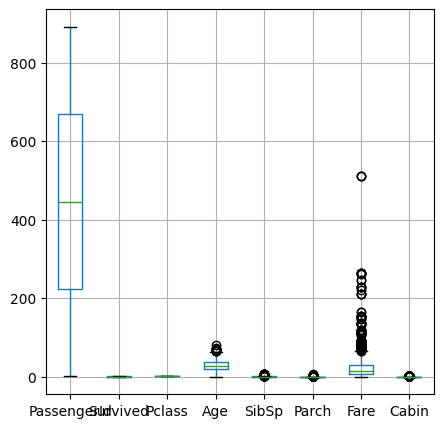

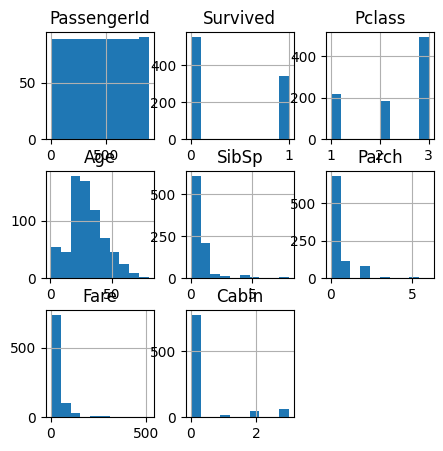

In [92]:
## do the same but with a histogram
df.hist(bins=10, figsize=(5,5))
plt.show()

In [93]:
## fill the missing values in age with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

## fill the missing values in cabin with median
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].median())

In [94]:
## print dataset after inputting missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [95]:
## convert also gender to numeric 
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})  

##convert ports to numbers
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  

## replace missing values (NaN) with 0
df['Embarked'] = df['Embarked'].fillna(0)


In [96]:
## drop columns that do not have numeric data
df = df.drop(columns=['Name','Ticket']) 



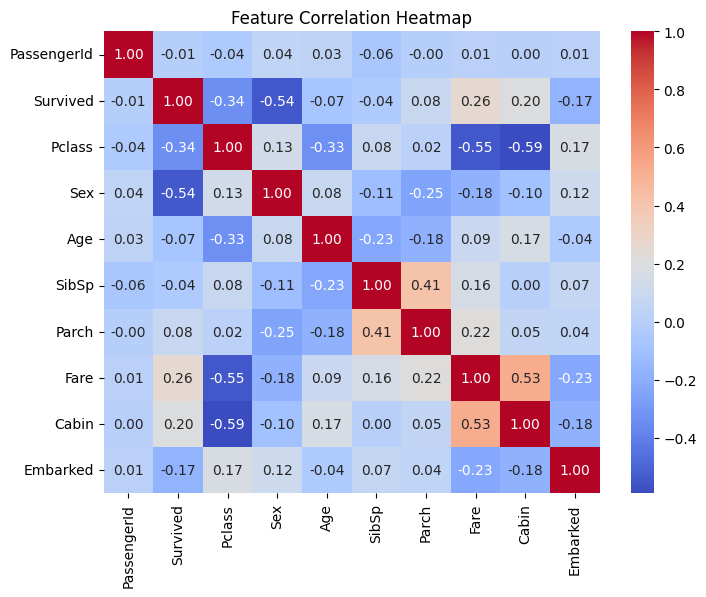

In [97]:
## look into correlations i.e. which factors are most likely associated with survival
correlation_matrix = df.corr()

# Plot heatmap of correlation
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# values close to +1 → Strong positive correlation 
# Values close to -1 → Strong negative correlation 
# Values close to 0 → No strong relationship


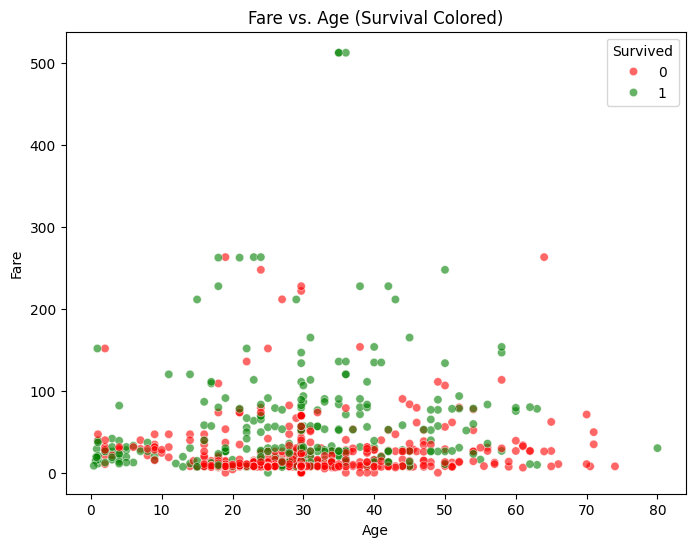

In [98]:
# show a scatter plot to indicate correlation between age, fare and survival

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Survived'], palette=['red', 'green'], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Fare vs. Age (Survival Colored)")
plt.show()


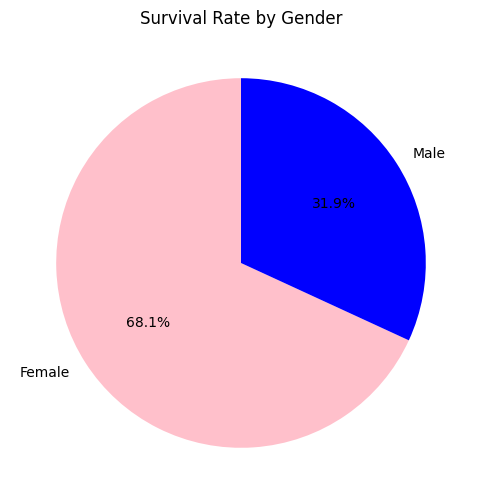

In [99]:
# show survived passengers by gender in a pie chart
survival_by_gender = df.groupby('Sex')['Survived'].sum()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(survival_by_gender, labels=['Female', 'Male'], autopct='%1.1f%%', colors=['pink', 'blue'], startangle=90)
plt.title("Survival Rate by Gender")
plt.show()


In [100]:
# for the logistic regression we need to look at the variables 
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]  
y = df['Survived'] 

# then we need to split the data into test data and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)


In [101]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\nora_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
# Predict on test data
y_pred = model.predict(X_test)


In [103]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")



Model Accuracy: 0.78
